Importation des librairies

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_predict,train_test_split
import matplotlib.pyplot as plt
from joblib import dump
import seaborn as sns
import pandas as pd
import numpy as np
import time

Analyse de la distribution et des attributs

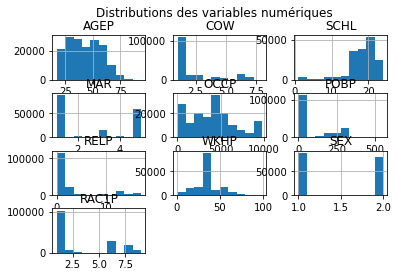

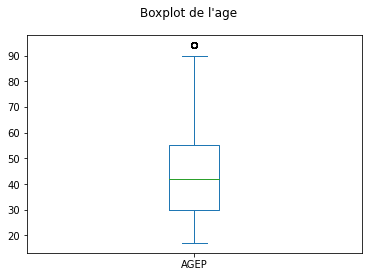

In [5]:
#Importation des dataset contenant les features et les labels
df = pd.read_csv('alt_acsincome_ca_features_85.csv')
df_label = pd.read_csv('alt_acsincome_ca_labels_85.csv')

df.hist()
plt.suptitle('Distributions des variables numériques')
plt.show()

df['AGEP'].plot(kind='box')
plt.suptitle("Boxplot de l'age")
plt.show()

Partition du jeu de données

In [7]:
X = df
y = df_label['PINCP'].astype(int)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,train_size=0.8)

Préparation des données

In [8]:
my_scaler = StandardScaler()
X_scaled = my_scaler.fit_transform(X_train)

#On ne fit pas les données de tests
X_scaled_test = my_scaler.transform(X_test)

#Sauvegarde de la standardisation effectuée
dump(my_scaler, 'scaler.joblib')

['scaler.joblib']

# Recherche de bons modèles #

### Random Forest 

In [ ]:
#Choix du modèle
rf = RandomForestClassifier()

#Entrainement du modèle
start_time = time.time()
model = rf.fit(X_scaled,y_train)
#Utilisation d'une validation croisée pour la prédiction
y_pred = cross_val_predict(model, X_scaled_test, y_test, cv=5)
end_time = time.time()

In [13]:
#On print différentes valeurs nous donnant des informations sur la qualité de l'apprentissage
exec_time = end_time - start_time
print("Temps d'execution = ", exec_time,"secondes")
print("classification report :  \n", classification_report(y_test,y_pred))
print("accuracy score : ", accuracy_score(y_test,y_pred)*100,"%")
print("matrice de confusion : \n", confusion_matrix(y_test,y_pred))

Temps d'execution =  27.411150693893433 secondes
classification report :  
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     19675
           1       0.78      0.75      0.76     13588

    accuracy                           0.81     33263
   macro avg       0.80      0.80      0.80     33263
weighted avg       0.81      0.81      0.81     33263

accuracy score :  80.93377025523856 %
matrice de confusion : 
 [[16763  2912]
 [ 3430 10158]]


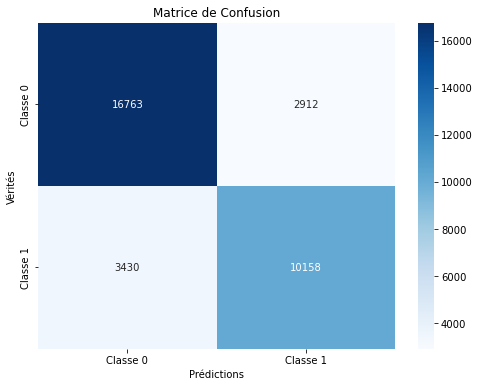

In [14]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Classe 0', 'Classe 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de Confusion')
plt.show()

Random forest : amélioration du modèle

In [16]:
param_grid = {
    'n_estimators':[500],
    'max_depth':range(20,50),
    'min_samples_split':range(5,20)
}

grid_search = RandomizedSearchCV(estimator=RandomForestClassifier(), cv=5, scoring='accuracy',n_iter=20,param_distributions=param_grid)
grid_search.fit(X_scaled,y_train)
print(f"Meilleurs hyperparametres: {grid_search.best_params_}")

meilleur_model = grid_search.best_estimator_

Meilleurs hyperparametres: {'n_estimators': 500, 'min_samples_split': 19, 'max_depth': 37}


In [19]:
meilleur_model_rf = meilleur_model
y_pred = cross_val_predict(meilleur_model_rf, X_scaled_test, y_test, cv=5)

In [20]:
#On print différentes valeurs nous donnant des informations sur la qualité de l'apprentissage
print("classification report :  \n", classification_report(y_test,y_pred))
print("accuracy score : ", accuracy_score(y_test,y_pred)*100,"%")
print("matrice de confusion : \n", confusion_matrix(y_test,y_pred))

classification report :  
               precision    recall  f1-score   support

           0       0.84      0.86      0.85     19675
           1       0.79      0.76      0.77     13588

    accuracy                           0.82     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263

accuracy score :  81.6132038601449 %
matrice de confusion : 
 [[16864  2811]
 [ 3305 10283]]


In [21]:
#Sauvegarde du meilleur modèle
dump(meilleur_model_rf, 'RandomForest_BestModel_08161.joblib')

['RandomForest_BestModel_08161.joblib']

### GradientBoosting

In [22]:
#Choix du modèle
gb = GradientBoostingClassifier()

#Entrainement du modèle
start_time = time.time()
model = gb.fit(X_scaled,y_train)
#Utilisation d'une validation croisée pour la prédiction
y_pred = cross_val_predict(model, X_scaled_test, y_test, cv=5)
end_time = time.time()

In [23]:
#On print différentes valeurs nous donnant des informations sur la qualité de l'apprentissage
exec_time = end_time - start_time
print("Temps d'execution = ", exec_time,"secondes")
print("classification report :  \n", classification_report(y_test,y_pred))
print("accuracy score : ", accuracy_score(y_test,y_pred)*100,"%")
print("matrice de confusion : \n", confusion_matrix(y_test,y_pred))

Temps d'execution =  21.23578405380249 secondes
classification report :  
               precision    recall  f1-score   support

           0       0.84      0.85      0.84     19675
           1       0.78      0.76      0.77     13588

    accuracy                           0.81     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.81      0.81      0.81     33263

accuracy score :  81.33060758199801 %
matrice de confusion : 
 [[16728  2947]
 [ 3263 10325]]


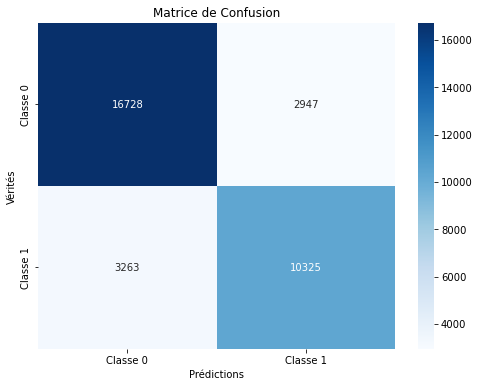

In [24]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Classe 0', 'Classe 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.title('Matrice de Confusion')
plt.show()

Gradient Boosting : amélioration du modèle

In [ ]:
param_grid = {
    'n_estimators':range(160,180),
    'learning_rate': np.linspace(0.4,0.8,100),
    'max_depth':[2],
    'min_samples_split':range(60,100),
    'subsample': np.linspace(0.7,0.9,100)
}

grid_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(), cv=5, scoring='accuracy',n_iter=20,param_distributions=param_grid)
grid_search.fit(X_scaled,y_train)
print(f"Meilleurs hyperparametres: {grid_search.best_params_}")

meilleur_model_gb = grid_search.best_estimator_

In [30]:
#Random search fais dans un autre fichier (long à réexecuter)

gb = GradientBoostingClassifier(n_estimators=173, subsample=0.85, min_samples_split=70, max_depth=2, learning_rate=0.5)
meilleur_model_gb = gb.fit(X_scaled,y_train)
y_pred = cross_val_predict(meilleur_model_gb, X_scaled_test, y_test, cv=5)

In [31]:
#On print différentes valeurs nous donnant des informations sur la qualité de l'apprentissage
print("classification report :  \n", classification_report(y_test,y_pred))
print("accuracy score : ", accuracy_score(y_test,y_pred)*100,"%")
print("matrice de confusion : \n", confusion_matrix(y_test,y_pred))

classification report :  
               precision    recall  f1-score   support

           0       0.85      0.85      0.85     19675
           1       0.78      0.78      0.78     13588

    accuracy                           0.82     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263

accuracy score :  81.93187625890629 %
matrice de confusion : 
 [[16695  2980]
 [ 3030 10558]]


In [32]:
#Sauvegarde du meilleur modèle
dump(meilleur_model_gb, 'GradientBoosting_BestModel_08193.joblib')

['GradientBoosting_BestModel_08193.joblib']

### AdaBoost 

In [28]:
#Choix du modèle
ada = AdaBoostClassifier()

#Entrainement du modèle
start_time = time.time()
model = ada.fit(X_scaled,y_train)
#Utilisation d'une validation croisée pour la prédiction
y_pred = cross_val_predict(model, X_scaled_test, y_test, cv=5)
end_time = time.time()

/home/revol/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/revol/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/revol/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/revol/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

In [29]:
#On print différentes valeurs nous donnant des informations sur la qualité de l'apprentissage
exec_time = end_time - start_time
print("Temps d'execution = ", exec_time,"secondes")
print("classification report :  \n", classification_report(y_test,y_pred))
print("accuracy score : ", accuracy_score(y_test,y_pred)*100,"%")
print("matrice de confusion : \n", confusion_matrix(y_test,y_pred))

Temps d'execution =  6.146418333053589 secondes
classification report :  
               precision    recall  f1-score   support

           0       0.84      0.85      0.84     19675
           1       0.77      0.76      0.76     13588

    accuracy                           0.81     33263
   macro avg       0.80      0.80      0.80     33263
weighted avg       0.81      0.81      0.81     33263

accuracy score :  80.96383368908397 %
matrice de confusion : 
 [[16626  3049]
 [ 3283 10305]]


AdaBoost : amélioration du modèle

In [ ]:
param_grid = {
    'n_estimators':[500],
    'learning_rate':np.linspace(0.6,1,10)
}

#Utilisation d'un grid search pour trouver le meilleur paramètre parmis ceux prétrouvé
grid_search = GridSearchCV(estimator=AdaBoostClassifier(), scoring='accuracy',param_grid=param_grid)
grid_search.fit(X_scaled,y_train)
print(f"Meilleurs hyperparametres: {grid_search.best_params_}")

meilleur_model_ada = grid_search.best_estimator_

In [35]:
#Grid search fais dans un autre fichier (long à réexecuter)

ada = AdaBoostClassifier(n_estimators=800,learning_rate=0.85)
meilleur_model_ada = ada.fit(X_scaled,y_train)
y_pred = cross_val_predict(meilleur_model_ada, X_scaled_test, y_test, cv=5)

/home/revol/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/revol/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/revol/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/revol/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warning

In [36]:
#On print différentes valeurs nous donnant des informations sur la qualité de l'apprentissage
print("classification report :  \n", classification_report(y_test,y_pred))
print("accuracy score : ", accuracy_score(y_test,y_pred)*100,"%")
print("matrice de confusion : \n", confusion_matrix(y_test,y_pred))

classification report :  
               precision    recall  f1-score   support

           0       0.84      0.85      0.85     19675
           1       0.78      0.77      0.78     13588

    accuracy                           0.82     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263

accuracy score :  81.78456543306376 %
matrice de confusion : 
 [[16693  2982]
 [ 3077 10511]]


In [37]:
#Sauvegarde du meilleur modèle
dump(meilleur_model_ada, 'AdaBoost_BestModel_08178.joblib')

['AdaBoost_BestModel_08178.joblib']

Inférence sur un autre jeu de donnée.

# Interprétabilité

### Importance des features

Random Forest

In [38]:
importances = meilleur_model_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

  Feature  Importance
4    OCCP    0.259047
7    WKHP    0.171130
2    SCHL    0.166863
0    AGEP    0.133887
6    RELP    0.094604
5    POBP    0.065850
1     COW    0.032750
3     MAR    0.030285
8     SEX    0.023721
9   RAC1P    0.021863


AdaBoost

In [39]:
importances = meilleur_model_ada.feature_importances_

feature_importance_ada = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_ada = feature_importance_ada.sort_values(by='Importance', ascending=False)

print(feature_importance_ada)

  Feature  Importance
4    OCCP     0.73125
7    WKHP     0.06125
0    AGEP     0.05500
5    POBP     0.04125
6    RELP     0.03375
2    SCHL     0.03000
1     COW     0.02000
9   RAC1P     0.01750
3     MAR     0.00500
8     SEX     0.00500


GradientBoost

In [40]:
importances = meilleur_model_gb.feature_importances_

feature_importance_gb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_gb = feature_importance_gb.sort_values(by='Importance', ascending=False)

print(feature_importance_gb)

  Feature  Importance
4    OCCP    0.344870
7    WKHP    0.225967
2    SCHL    0.180225
6    RELP    0.098197
0    AGEP    0.087681
8     SEX    0.024257
5    POBP    0.019492
1     COW    0.010291
3     MAR    0.006138
9   RAC1P    0.002884


### Corrélation entre les variables

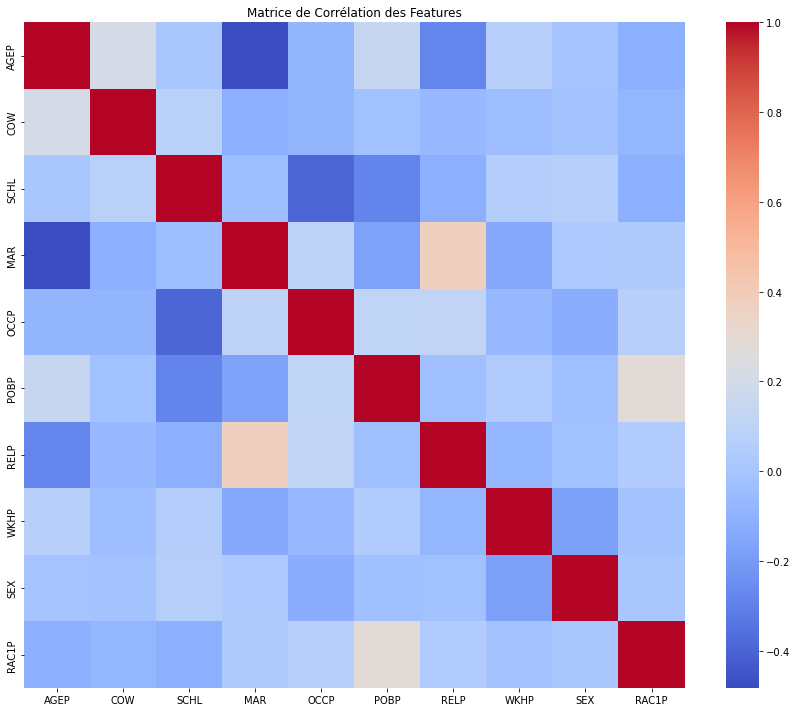

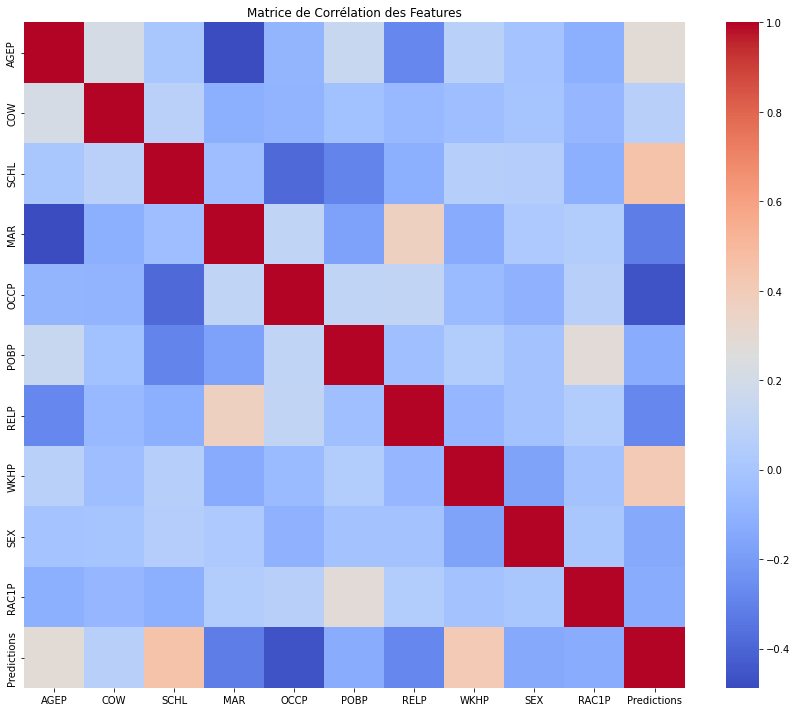

In [41]:
# --- Corrélation entre les features ---
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title("Matrice de Corrélation des Features")
plt.tight_layout()
plt.show()

# Ajouter les prédictions au DataFrame original
X_test_df = pd.DataFrame(X_scaled_test, columns=X.columns)  # Convertir X_test en DataFrame avec noms des colonnes
X_test_df['Predictions'] = y_pred  # Ajouter les prédictions au DataFrame

# Calculer la nouvelle matrice de corrélation
correlation_matrix_with_preds = X_test_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_with_preds, annot=False, cmap='coolwarm', cbar=True, fmt='.2f')
plt.title("Matrice de Corrélation des Features")
plt.tight_layout()
plt.show()

# Equité des modèles

Sur le dataset

In [ ]:
df_eval = df.loc()
df_eval['PINCP'] = df_label
print("Total length is : ",len(df_eval))
df_false = df_eval.loc[df_eval['PINCP']==False]  
print("Le taux d'individus ayant un nombre supérieur à 50000 est : ",((len(df_eval) - len(df_false))/len(df_eval))*100,"%")
print("Pour les femmes, le taux est ", ((df_eval[df_eval["SEX"] == 2].shape[0]- df_false[df_false["SEX"]==2].shape[0])/df_eval[df_eval["SEX"] == 2].shape[0])*100,"%")
print("Tandis que pour les hommes, le taux est ", ((df_eval[df_eval["SEX"] == 1].shape[0]- df_false[df_false["SEX"]==1].shape[0])/df_eval[df_eval["SEX"] == 1].shape[0])*100,"%")

Après application des modèles (fais avec GradientBoost)

In [43]:
y_pred = cross_val_predict(meilleur_model_gb, X_scaled_test, y_test, cv=5)

results_df = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred,
    'SEX': X_test['SEX']  
})

# Calcul des métriques par genre
genres = results_df['SEX'].unique()
metrics = []

for genre in genres:
    subset = results_df[results_df['SEX'] == genre]
    
    # Matrice de confusion
    cm = confusion_matrix(subset['y_true'], subset['y_pred'], labels=[0, 1])
    
    # Taux de prédictions positives (Statistical Parity)
    taux_positifs = (subset['y_pred'] == 1).mean()
    
    # Taux de vrais positifs (Equal Opportunity)
    vrais_positifs = ((subset['y_true'] == 1) & (subset['y_pred'] == 1)).sum()
    total_positifs = (subset['y_true'] == 1).sum()
    taux_vrais_positifs = vrais_positifs / total_positifs if total_positifs > 0 else 0
    
    # Taux de faux positifs (Predictive Equality)
    faux_positifs = ((subset['y_true'] == 0) & (subset['y_pred'] == 1)).sum()
    total_negatifs = (subset['y_true'] == 0).sum()
    taux_faux_positifs = faux_positifs / total_negatifs if total_negatifs > 0 else 0
    
    metrics.append({
        'Genre': 'Homme' if genre == 1 else 'Femme',
        'Statistical Parity': taux_positifs,
        'Equal Opportunity': taux_vrais_positifs,
        'Predictive Equality': taux_faux_positifs
    })

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

   Genre  Statistical Parity  Equal Opportunity  Predictive Equality
0  Homme            0.471314           0.807815             0.179773
1  Femme            0.329995           0.726217             0.120367


### Suppression de la ligne "SEX"

In [45]:
y_ss = df_label['PINCP'].astype(int)
X_ss = df.drop('SEX',axis=1)

print(X_ss)

        AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  RAC1P
0       41.0  4.0  24.0  1.0  2555.0    6.0   1.0  60.0    1.0
1       77.0  7.0  22.0  1.0  4920.0   39.0   0.0  35.0    1.0
2       38.0  1.0  18.0  1.0   440.0    6.0   1.0  50.0    1.0
3       30.0  1.0  22.0  5.0  1555.0    6.0   2.0  80.0    6.0
4       36.0  1.0  16.0  1.0  4030.0  314.0   1.0  70.0    1.0
...      ...  ...   ...  ...     ...    ...   ...   ...    ...
166310  25.0  1.0  20.0  1.0  4720.0    6.0   7.0   8.0    1.0
166311  34.0  1.0  22.0  1.0   110.0  210.0   0.0  40.0    6.0
166312  54.0  3.0  18.0  1.0  7700.0    6.0   1.0  50.0    1.0
166313  39.0  1.0  16.0  5.0  9130.0    6.0   0.0  50.0    1.0
166314  32.0  1.0   9.0  5.0  4020.0  303.0   0.0  40.0    8.0

[166315 rows x 9 columns]


In [46]:
X_train_ss,X_test_ss,y_train_ss,y_test_ss = train_test_split(X,y,test_size=0.2,train_size=0.8)

my_scaler_ss = StandardScaler()
X_scaled_ss = my_scaler_ss.fit_transform(X_train_ss)
X_scaled_test_ss = my_scaler_ss.transform(X_test_ss)

gb = GradientBoostingClassifier(n_estimators=173, subsample=0.85, min_samples_split=70, max_depth=2, learning_rate=0.5)

model = gb.fit(X_scaled_ss,y_train_ss)
y_pred = cross_val_predict(model, X_scaled_test_ss, y_test_ss, cv=5)
print("classification report : ", classification_report(y_test_ss,y_pred))
print("accuracy score : ", accuracy_score(y_test_ss,y_pred))
print("matrice de confusion : ", confusion_matrix(y_test_ss,y_pred))

classification report :                precision    recall  f1-score   support

           0       0.84      0.85      0.84     19624
           1       0.78      0.77      0.77     13639

    accuracy                           0.82     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263

accuracy score :  0.815620960226077
matrice de confusion :  [[16660  2964]
 [ 3169 10470]]


In [47]:
X_test_with_sex = df.loc[X_test_ss.index]  
X_test_with_sex['SEX'] = df['SEX']
X_test_ss=X_test_with_sex

In [48]:
import seaborn as sns


results_df = pd.DataFrame({
    'y_true': y_test_ss,
    'y_pred': y_pred,
    'SEX': X_test_ss['SEX'] 
})


from sklearn.metrics import confusion_matrix

# Calcul des métriques par genre
genres = results_df['SEX'].unique()
metrics = []

for genre in genres:
    subset = results_df[results_df['SEX'] == genre]
    
    # Matrice de confusion
    cm = confusion_matrix(subset['y_true'], subset['y_pred'], labels=[0, 1])
    
    # Taux de prédictions positives (Statistical Parity)
    taux_positifs = (subset['y_pred'] == 1).mean()
    
    # Taux de vrais positifs (Equal Opportunity)
    vrais_positifs = ((subset['y_true'] == 1) & (subset['y_pred'] == 1)).sum()
    total_positifs = (subset['y_true'] == 1).sum()
    taux_vrais_positifs = vrais_positifs / total_positifs if total_positifs > 0 else 0
    
    # Taux de faux positifs (Predictive Equality)
    faux_positifs = ((subset['y_true'] == 0) & (subset['y_pred'] == 1)).sum()
    total_negatifs = (subset['y_true'] == 0).sum()
    taux_faux_positifs = faux_positifs / total_negatifs if total_negatifs > 0 else 0
    
    metrics.append({
        'Genre': 'Homme' if genre == 1 else 'Femme',
        'Statistical Parity': taux_positifs,
        'Equal Opportunity': taux_vrais_positifs,
        'Predictive Equality': taux_faux_positifs
    })

metrics_df = pd.DataFrame(metrics)
print(metrics_df)




   Genre  Statistical Parity  Equal Opportunity  Predictive Equality
0  Homme            0.444211           0.777023             0.161097
1  Femme            0.358485           0.753968             0.141571
